In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize

In [13]:
df = pd.read_csv("MCRealTimeCorrelationsDiffpoint1.csv")

In [14]:
df.head()

,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,0,...,0.130,0.131,0.132,0.133,0.134,0.135,0.136,0.137,0.138,0.139
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,1,1,1,1


In [15]:
av_tau_u = np.array(df.mean(axis=0))
av_tau_0 = av_tau_u[0]
new_df = df.mul(df.iloc[:, 0], axis=0)
av_tau_product = np.array(new_df.mean(axis=0))

corr_func = av_tau_product - av_tau_0 * av_tau_u

In [16]:
def model_func(t, A, K):
    return A * np.exp(-K * t)

def model_func2(t, A, K, C):
    return A * np.exp(-K * t) + C

def fit_exp_nonlinear(t, y):
    opt_parms, parm_cov = sp.optimize.curve_fit(model_func, t, y)
    A, K = opt_parms
    return A, K

def fit_exp_nonlinear2(t, y):
    opt_parms, parm_cov = sp.optimize.curve_fit(model_func2, t, y)
    A, K, C = opt_parms
    return A, K, C

def plot(ax, t, y, fit_y, fit_parms):
    A, K = fit_parms
    ax.plot(t, fit_y, 'b-',
    label='Fitted Function:\n $y = %0.2f e^{-%0.2f t}$' % (A, K))
    ax.plot(t, y, 'ro')
    ax.legend(bbox_to_anchor=(1.05, 1.1), fancybox=True, shadow=True)

def plot2(ax, t, y, fit_y, fit_parms):
    A, K, C = fit_parms
    ax.plot(t, fit_y, 'b-',
    label='Fitted Function:\n $y = %0.2f e^{-%0.2f t} + %0.2f$' % (A, K, C))
    ax.plot(t, y, 'ro')
    ax.legend(bbox_to_anchor=(1.05, 1.1), fancybox=True, shadow=True)

In [17]:
t = np.arange(0, len(corr_func)*0.2, 0.2)

In [18]:
"""fig, ax = plt.subplots(figsize=(10, 6))

# Non-linear Fit
A, K, C = fit_exp_nonlinear2(t, corr_func)
print(K)
fit_y = model_func2(t, A, K, C)
plot(ax, t, corr_func, fit_y, (A, K, C))
ax.set_title('Low Density Phase ' + r'$\alpha$ = 0.25 ' + r'$\beta$ = 0.75')
ax.set_xlabel('Time after steady state reached')
ax.set_ylabel('Correlation function')

plt.show()"""

"fig, ax = plt.subplots(figsize=(10, 6))\n\n# Non-linear Fit\nA, K, C = fit_exp_nonlinear2(t, corr_func)\nprint(K)\nfit_y = model_func2(t, A, K, C)\nplot(ax, t, corr_func, fit_y, (A, K, C))\nax.set_title('Low Density Phase ' + r'$\x07lpha$ = 0.25 ' + r'$\x08eta$ = 0.75')\nax.set_xlabel('Time after steady state reached')\nax.set_ylabel('Correlation function')\n\nplt.show()"

0.22040648068801919


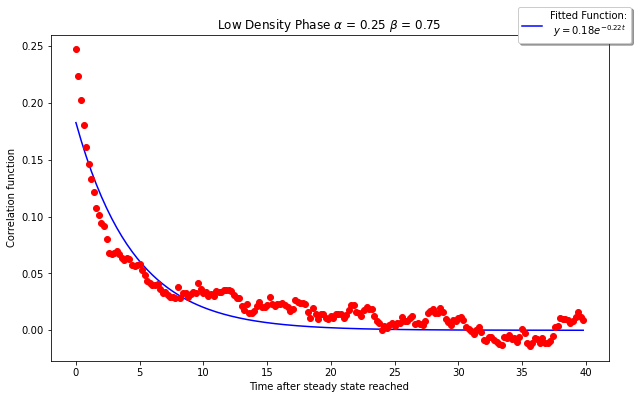

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))

# Non-linear Fit
A, K = fit_exp_nonlinear(t, corr_func)
print(K)
fit_y = model_func(t, A, K)
plot(ax, t, corr_func, fit_y, (A, K))
ax.set_title('Low Density Phase ' + r'$\alpha$ = 0.25 ' + r'$\beta$ = 0.75')
ax.set_xlabel('Time after steady state reached')
ax.set_ylabel('Correlation function')

plt.show()